In [1]:
import xscale.signal.generator as xgen

In [2]:
foo = xgen.example_xyt()
foo

<xarray.DataArray 'example_xyt' (time: 100, y: 128, x: 128)>
dask.array<shape=(100, 128, 128), dtype=float64, chunksize=(50, 70, 70)>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 2011-01-03 ...
  * y        (y) float64 0.0 0.04947 0.09895 0.1484 0.1979 0.2474 0.2968 ...
  * x        (x) float64 0.0 0.04947 0.09895 0.1484 0.1979 0.2474 0.2968 ...

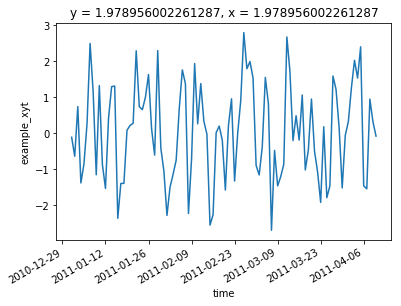

In [3]:
foo.isel(y=40, x=40).plot()

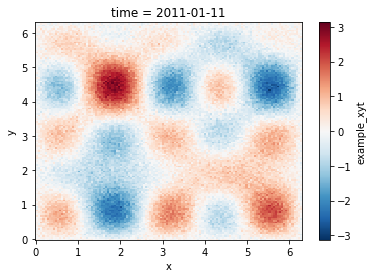

In [4]:
foo.isel(time=10).plot()

In [5]:
import xscale

In [6]:
wt = foo.window

In [7]:
wt.set()

In [8]:
print(wt)

Window [order->{'time': 100, 'y': 128, 'x': 128}, cutoff->{'time': None, 'y': None, 'x': None}, dx->{'time': 86400.0, 'y': 0.049473900056532176, 'x': 0.049473900056532176}, window->{'time': 'boxcar', 'y': 'boxcar', 'x': 'boxcar'}]


In [9]:
wt.set(n=20, dim='time', window='boxcar')

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in log10
  return func(*args2)


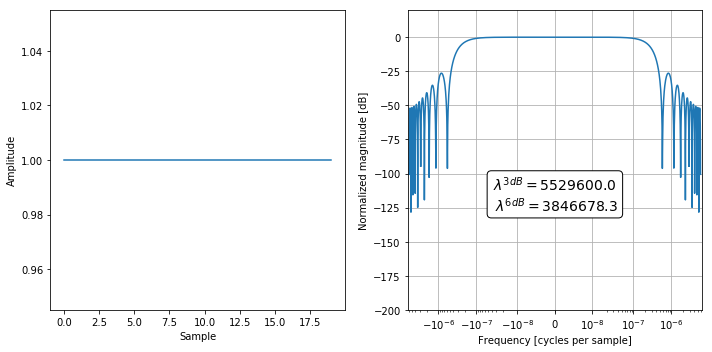

In [11]:
wt.plot()

In [13]:
cutoff_10d = 10 # A 10-day cutoff
dx_1d = 1 # Define the sampling period (one day)

wt.set(n=20, dim='time', cutoff=cutoff_10d, dx=dx_1d, window='hanning')

In [14]:
res = wt.convolve()

In [15]:
res_valid = wt.convolve(trim=True)

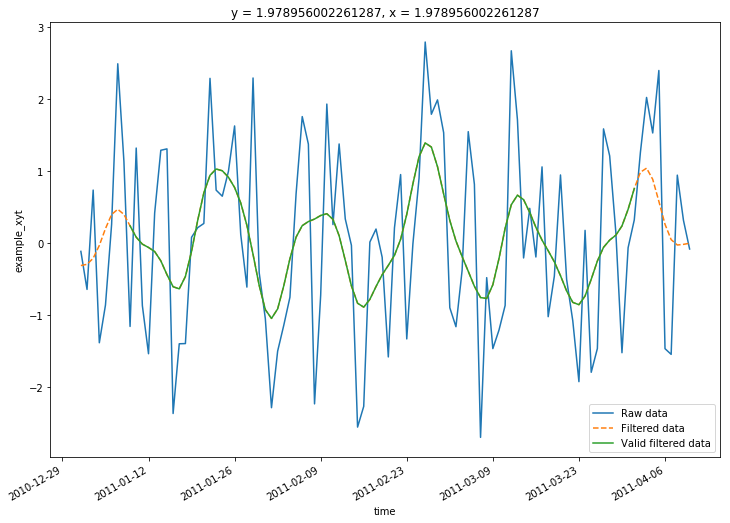

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))


foo.isel(y=40, x=40).plot(label="Raw data")
res.isel(y=40, x=40).plot(label="Filtered data", ls="--")
res_valid.isel(y=40, x=40).plot(label="Valid filtered data")
plt.legend()
plt.show()

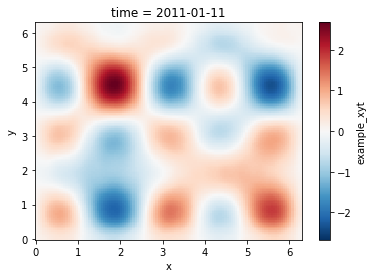

In [20]:
ws = foo.window
ws.set(n={'x': 10, 'y': 15}, window={'x':'hanning', 'y':('tukey', 0.25)})


res2 = ws.convolve()
res2.isel(time=10).plot()
plt.show()
